In [25]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [26]:
# Data Source:https://unstats.un.org/sdgs/UNSDGAPIV5/swagger/index.html
un_goals = pd.read_csv("Resources/UN_Goals.csv")

un_goals_clean = un_goals[["Target", 'GeoAreaName', 'TimePeriod', 'Value', '[Units]']]
un_goals_clean.head()

,Target,GeoAreaName,TimePeriod,Value,[Units]
0,13.2,Canada,1990,601.52369,MT_CO2E
1,13.2,Canada,1991,595.77673,MT_CO2E
2,13.2,Canada,1992,613.59852,MT_CO2E
3,13.2,Canada,1993,616.79839,MT_CO2E
4,13.2,Canada,1994,638.00047,MT_CO2E


In [27]:
total_un_goals_clean=un_goals_clean.groupby('TimePeriod').agg({'Value':["mean","median","min","max"]})
total_un_goals_clean


Value                                 
                  mean     median        min        max
TimePeriod                                             
1990        601.523690  601.52369  601.52369  601.52369
1991        595.776730  595.77673  595.77673  595.77673
1992        613.598520  613.59852  613.59852  613.59852
1993        616.798390  616.79839  616.79839  616.79839
1994        638.000470  638.00047  638.00047  638.00047
1995        656.298720  656.29872  656.29872  656.29872
1996        678.714490  678.71449  678.71449  678.71449
1997        691.195370  691.19537  691.19537  691.19537
1998        696.901520  696.90152  696.90152  696.90152
1999        709.600920  709.60092  709.60092  709.60092
2000        733.511340  733.51134  733.51134  733.51134
2001        722.935010  722.93501  722.93501  722.93501
2002        726.555180  726.55518  726.55518  726.55518
2003        744.831890  744.83189  744.83189  744.83189
2004        745.919780  745.91978  745.91978  745.91978
2005        738.718600  738.71860  738.71860  738.71860
2006        730.101940  730.10194  730.10194  730.10194
2007        751.661270  751.66127  751.66127  751.66127
2008        735.692850  735.69285  735.69285  735.69285
2009        693.597900  693.59790  693.59790  693.59790
2010        702.802750  702.80275  702.80275  702.80275
2011         57.538465    2.77000    0.17000  714.07851
2012         57.797314    2.35000    0.05000  717.17239
2013         61.232989    3.63500    0.06000  725.37184
2014         61.589119    3.14500    0.12000  722.55767
2015         62.814001    3.75000    0.19000  723.09602
2016         62.818851    4.55500    0.19000  706.93391
2017         62.510859    5.73500    0.00001  716.09201
2018         64.942728    6.72000    0.00010  728.47589
2019        730.244940  730.24494  730.24494  730.24494

In [28]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

canada_result = pd.read_csv("Resources/Economic_Sector_Canada.csv")
canada_result.head()


,Sectors - Mt CO2 eq,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NATIONAL TOTAL,595,588,605,608,628,645,667,682,689,...,721,726,732,730,733,715,725,740,738,672
1,Oil and Gas,103,102,111,118,122,128,135,137,141,...,187,194,199,205,205,194,196,205,203,179
2,Electricity,95,96,103,93,95,98,98,109,122,...,87,83,80,76,80,74,73,63,62,56
3,Transport,120,114,115,117,121,122,126,131,137,...,168,171,174,171,172,173,179,184,185,159
4,Heavy Industry,97,97,95,94,100,100,103,103,98,...,80,80,79,79,78,76,76,77,77,72


In [29]:
#transposed
df1 = canada_result.set_index(['Sectors - Mt CO2 eq'])
df2 = df1.transpose()
df3 = df2[['Oil and Gas', 'Electricity', 'Transport','NATIONAL TOTAL']]
df4 = df3.reset_index()
transpose_can_result = df4.rename(columns={'index':'Years'})
transpose_can_result

Sectors - Mt CO2 eq,Years,Oil and Gas,Electricity,Transport,NATIONAL TOTAL
0,1990,103,95,120,595
1,1991,102,96,114,588
2,1992,111,103,115,605
3,1993,118,93,117,608
4,1994,122,95,121,628
5,1995,128,98,122,645
6,1996,135,98,126,667
7,1997,137,109,131,682
8,1998,141,122,137,689
9,1999,150,119,143,702


In [31]:
transpose_can_result.dtypes

Sectors - Mt CO2 eq
Years             object
Oil and Gas        int64
Electricity        int64
Transport          int64
NATIONAL TOTAL     int64
dtype: object

In [32]:
total_canada_max_oil_gas = transpose_can_result['Oil and Gas'].max()
total_canada_year_oil_gas = transpose_can_result['Oil and Gas'].idxmax()
total_canada_min_oil_gas = transpose_can_result['Oil and Gas'].min()




total_canada_max_electricity = transpose_can_result['Electricity'].max()
total_canada_year_electricity = transpose_can_result['Electricity'].idxmax()
total_canada_min_electricity = transpose_can_result['Electricity'].min()

total_canada_max_transport = transpose_can_result['Transport'].max()
total_canada_year_transport = transpose_can_result['Transport'].idxmax()
total_canada_min_transport = transpose_can_result['Transport'].min()





In [33]:
# Filter the DataFrame based on the minimum oil and gas production value
min_oil_gas_df = transpose_can_result.loc[transpose_can_result['Oil and Gas'] == total_canada_min_oil_gas]
max_oil_gas_df = transpose_can_result.loc[transpose_can_result['Oil and Gas'] == total_canada_max_oil_gas]

min_Electricity_df = transpose_can_result.loc[transpose_can_result['Electricity'] == total_canada_min_electricity]
max_Electricity_df = transpose_can_result.loc[transpose_can_result['Electricity'] == total_canada_max_electricity]

min_Transport_df = transpose_can_result.loc[transpose_can_result['Transport'] == total_canada_min_transport]
max_Transport_df = transpose_can_result.loc[transpose_can_result['Transport'] == total_canada_max_transport]



# Reset the index to a column named 'Years'
min_oil_gas_df = min_oil_gas_df.reset_index().rename(columns={'index': 'Years'})
max_oil_gas_df = max_oil_gas_df.reset_index().rename(columns={'index': 'Years'})

min_Electricity_df = min_Electricity_df.reset_index().rename(columns={'index': 'Years'})
max_Electricity_df = max_Electricity_df.reset_index().rename(columns={'index': 'Years'})

min_Transport_df = min_Transport_df.reset_index().rename(columns={'index': 'Years'})
max_Transport_df = max_Transport_df.reset_index().rename(columns={'index': 'Years'})


# Extract the 'Years' column as a numpy array
min_oil_gas_years = min_oil_gas_df['Years'].values
max_oil_gas_years = max_oil_gas_df['Years'].values

min_Electricity_years = min_Electricity_df['Years'].values
max_Electricity_years = max_Electricity_df['Years'].values


min_Transport_years = min_Electricity_df['Years'].values
max_Transport_years = max_Electricity_df['Years'].values



# Print the values

print(f"Lowest Oil and Gas Emission {total_canada_min_oil_gas} at {min_oil_gas_years[0][1]}")
print(f"Highest Oil and Gas Emission {total_canada_max_oil_gas} at {max_oil_gas_years[0][1]}")

print(f"Lowest Electricity Emission {total_canada_min_electricity} at {min_Electricity_years[0][1]}")
print(f"Highest Electricity Emission {total_canada_max_electricity} at {max_Electricity_years[0][1]}")

print(f"Lowest Transport Emission {total_canada_min_transport} at {min_Transport_years[0][1]}")
print(f"Highest Transport Emission {total_canada_max_transport} at {max_Transport_years[0][1]}")




Lowest Oil and Gas Emission 102 at 1991
Highest Oil and Gas Emission 205 at 2014
Lowest Electricity Emission 56 at 2020
Highest Electricity Emission 129 at 2000
Lowest Transport Emission 114 at 2020
Highest Transport Emission 185 at 2000


In [34]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

provices_result = pd.read_csv("Resources/Economic_Sector_Prov.csv")
provices_result.head()


,Year,Region,Index,Source,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,165.65,Mt
1,1990,Alberta,1,Oil and Gas,61.96,Mt
2,1990,Alberta,2,Electricity,39.76,Mt
3,1990,Alberta,3,Transport,15.78,Mt
4,1990,Alberta,4,Heavy Industry,12.59,Mt


In [35]:
provices_result

,Year,Region,Index,Source,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,165.65,Mt
1,1990,Alberta,1,Oil and Gas,61.96,Mt
2,1990,Alberta,2,Electricity,39.76,Mt
3,1990,Alberta,3,Transport,15.78,Mt
4,1990,Alberta,4,Heavy Industry,12.59,Mt
...,...,...,...,...,...,...
3924,2020,Yukon,3924,Transport,0.41,Mt
3925,2020,Yukon,3925,Heavy Industry,0.03,Mt
3926,2020,Yukon,3926,Buildings,0.04,Mt
3927,2020,Yukon,3927,Waste,0.04,Mt


In [36]:

# Filter data by province and convert CO2eq to numeric
alberta = provices_result[(provices_result["Region"] == "Alberta")&(provices_result["Source"].isin(["Electricity", "Oil and Gas", "Transport"]))]
alberta.loc[:, "CO2eq"] = pd.to_numeric(alberta["CO2eq"], errors="coerce")

ontario = provices_result[(provices_result["Region"] == "Ontario")& (provices_result["Source"].isin(["Electricity", "Oil and Gas", "Transport"]))]
ontario.loc[:, "CO2eq"] = pd.to_numeric(ontario["CO2eq"], errors="coerce")

quebec = provices_result[(provices_result["Region"] == "Quebec")& (provices_result["Source"].isin(["Electricity", "Oil and Gas", "Transport"]))]
quebec.loc[:, "CO2eq"] = pd.to_numeric(quebec["CO2eq"], errors="coerce")

# Compute statistics for each province
alberta_scores_mean = alberta.groupby(["Source"])["CO2eq"].mean()
alberta_scores_median = alberta.groupby(["Source"]).median()
alberta_scores_mode = alberta.groupby(["Source"])["CO2eq"].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
alberta_scores_std = alberta.groupby(["Source"])["CO2eq"].std()
alberta_scores_var = alberta.groupby(["Source"])["CO2eq"].var()
alberta_scores_sem = alberta.groupby(["Source"])["CO2eq"].sem()

ontario_scores_mean = ontario.groupby(["Source"])["CO2eq"].mean()
ontario_scores_median = ontario.groupby(["Source"]).median()
ontario_scores_mode = ontario.groupby(["Source"])["CO2eq"].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
ontario_scores_std = ontario.groupby(["Source"])["CO2eq"].std()
ontario_scores_var = ontario.groupby(["Source"])["CO2eq"].var()
ontario_scores_sem = ontario.groupby(["Source"])["CO2eq"].sem()

quebec_scores_mean = quebec.groupby(["Source"])["CO2eq"].mean()
quebec_scores_median = quebec.groupby(["Source"]).median()
quebec_scores_mode = quebec.groupby(["Source"])["CO2eq"].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
quebec_scores_std = quebec.groupby(["Source"])["CO2eq"].std()
quebec_scores_var = quebec.groupby(["Source"])["CO2eq"].var()
quebec_scores_sem = quebec.groupby(["Source"])["CO2eq"].sem()

# Combine statistics for all provinces into a single dataframe
provinces_result_df = pd.concat([
    pd.DataFrame({"Region": "Alberta", 
                  "Source": alberta_scores_mean.index,
                  "Mean": alberta_scores_mean.values, 
                  "Median": alberta_scores_median["CO2eq"].values, 
                  "Mode": alberta_scores_mode.values, 
                  "STD": alberta_scores_std.values, 
                  "Variance": alberta_scores_var.values, 
                  "SEM": alberta_scores_sem.values}),
    pd.DataFrame({"Region": "Ontario", 
                  "Source": ontario_scores_mean.index,
                  "Mean": ontario_scores_mean.values,
                  "Median": ontario_scores_median["CO2eq"].values, 
                  "Mode": ontario_scores_mode.values, 
                  "STD": ontario_scores_std.values, 
                  "Variance": ontario_scores_var.values, 
                  "SEM": ontario_scores_sem.values}),
    pd.DataFrame({"Region": "Quebec", 
                  "Source": quebec_scores_mean.index,
                  "Mean": quebec_scores_mean.values,
                  "Median": quebec_scores_median["CO2eq"].values, 
                  "Mode": quebec_scores_mode.values, 
                  "STD": quebec_scores_std.values, 
                  "Variance": quebec_scores_var.values, 
                  "SEM": quebec_scores_sem.values})])

provinces_result_df   


C:\Users\josep\AppData\Local\Temp\ipykernel_35560\2256255879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alberta.loc[:, "CO2eq"] = pd.to_numeric(alberta["CO2eq"], errors="coerce")
C:\Users\josep\AppData\Local\Temp\ipykernel_35560\2256255879.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontario.loc[:, "CO2eq"] = pd.to_numeric(ontario["CO2eq"], errors="coerce")
C:\Users\josep\AppData\Local\Temp\ipykernel_35560\2256255879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Region,Source,Mean,Median,Mode,STD,Variance,SEM
0,Alberta,Electricity,44.688387,46.36,48.53,5.400612,29.166607,0.969979
1,Alberta,Oil and Gas,105.891935,105.34,61.96,27.378640,749.589943,4.917349
2,Alberta,Transport,23.670968,23.17,14.18,6.351657,40.343542,1.140791
0,Ontario,Electricity,21.405161,20.45,33.94,13.034502,169.898252,2.341066
1,Ontario,Oil and Gas,10.505161,10.91,11.08,1.687997,2.849332,0.303173
2,Ontario,Transport,50.650645,54.03,55.07,6.264606,39.245286,1.125156
0,Quebec,Electricity,0.706129,0.48,0.26,0.575805,0.331551,0.103418
1,Quebec,Oil and Gas,3.424839,3.73,2.63,0.776328,0.602686,0.139433
2,Quebec,Transport,29.203548,30.45,30.85,3.322981,11.042204,0.596825


In [37]:
Canada_df =  transpose_can_result.groupby('Years').sum()[["Oil and Gas","Electricity","Transport"]]
Canada_df 

Sectors - Mt CO2 eq,Oil and Gas,Electricity,Transport
Years,,,
1990,103,95,120
1991,102,96,114
1992,111,103,115
1993,118,93,117
1994,122,95,121
1995,128,98,122
1996,135,98,126
1997,137,109,131
1998,141,122,137


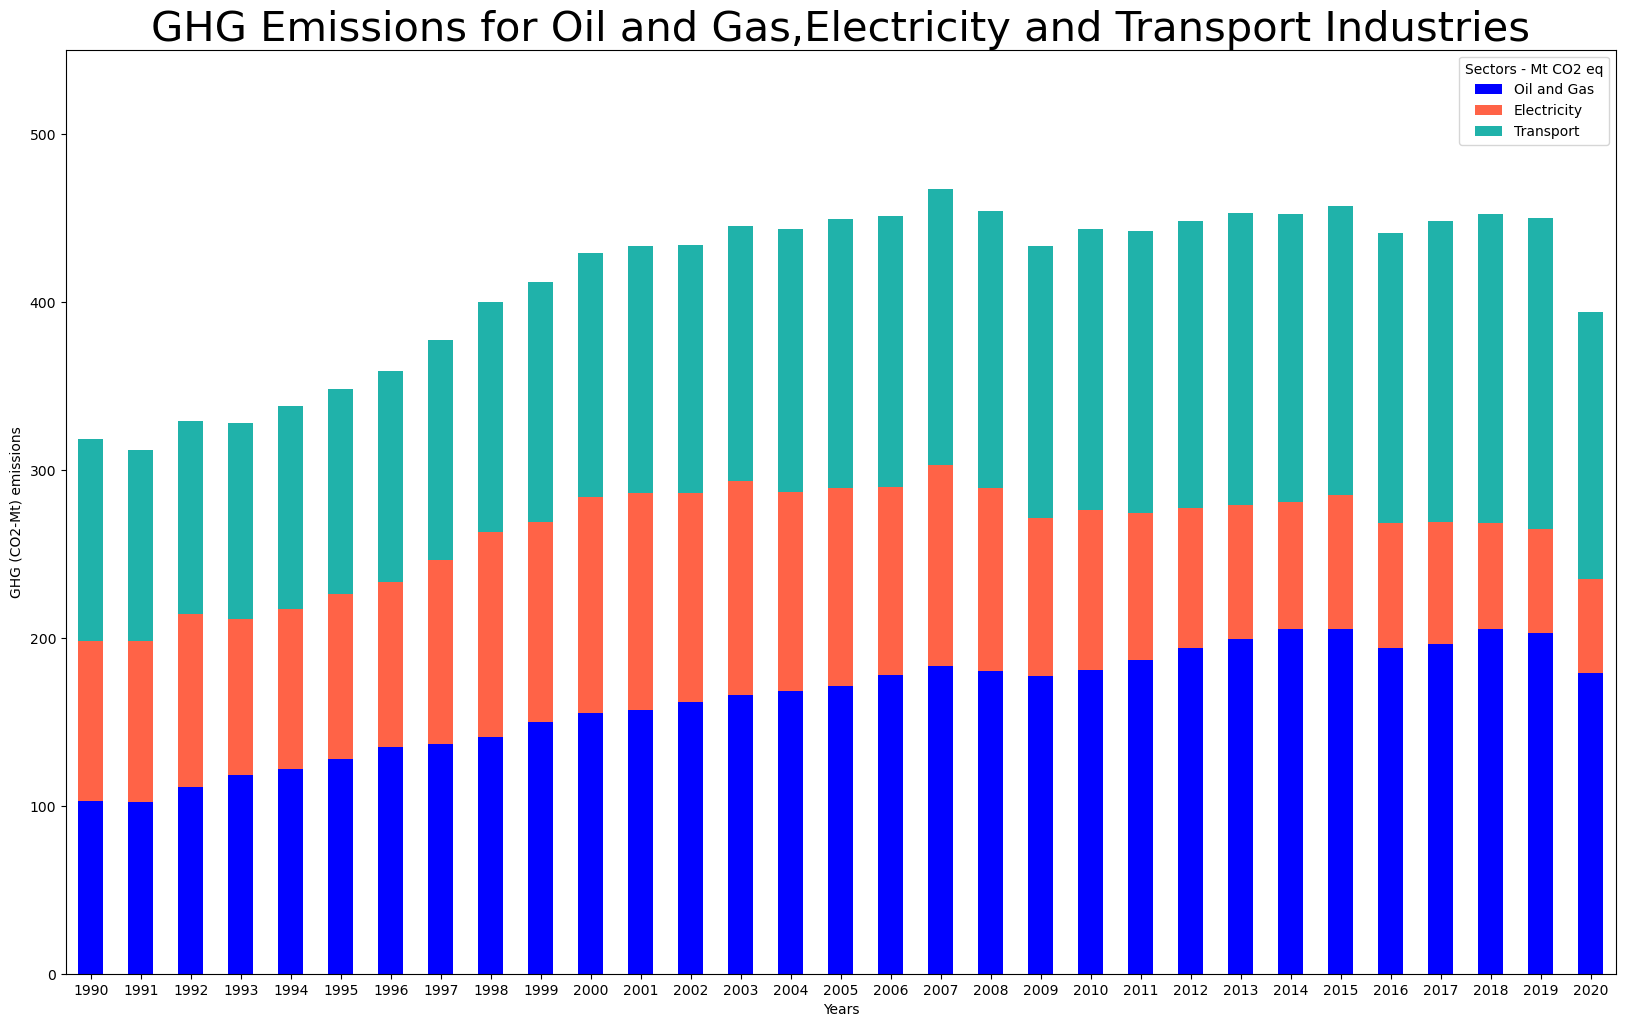

<Figure size 640x480 with 0 Axes>

In [38]:
#Generate a Stacked bar graph of Canada industries for Oil and & gas, Electricity and transport showing GHG emissions per year 

ax = Canada_df.plot.bar(stacked=True, color =['blue', 'tomato','lightseagreen'], figsize=(20,12))
ax.set_title('GHG Emissions for Oil and Gas,Electricity and Transport Industries', fontsize=30)
ax.set_ylim(0,550)

ax.set_xticklabels(["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation=0)

plt.xlabel("Years")
plt.ylabel("GHG (CO2-Mt) emissions")


#show graph and set layout
plt.savefig('Images/annbell_bar.png', bbox_inches='tight')
plt.show()
plt.tight_layout()


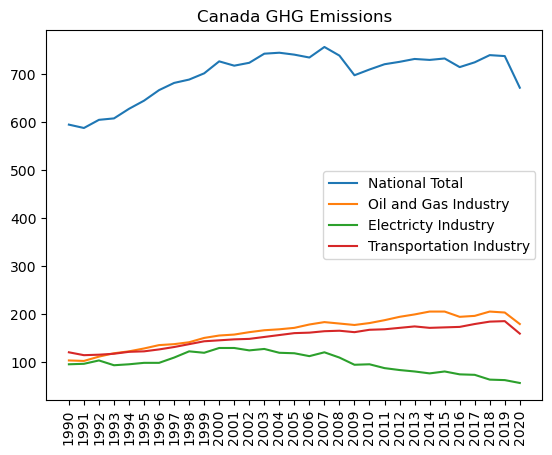

---------------------------------------------------------------------------


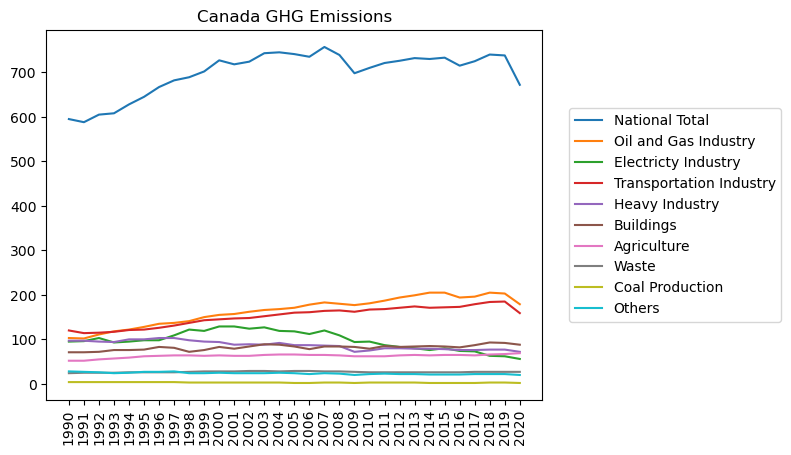

---------------------------------------------------------------------------


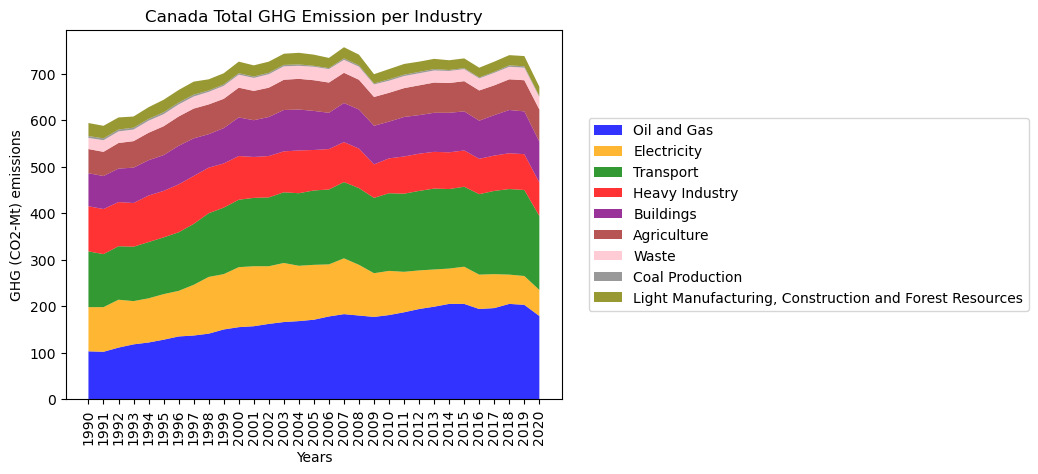

In [39]:
#preparing and cleaning dataset
df_1 = canada_result.set_index(['Sectors - Mt CO2 eq'])
df_2 = df_1.transpose()
df_4 = df_2.reset_index()
transpose_can_result_2 = df_4.rename(columns={'index':'Years'})

#two line graphs and stackplot

y2_nat_ttl = transpose_can_result_2['NATIONAL TOTAL']
y2_oil_gas = transpose_can_result_2['Oil and Gas']
y2_elec = transpose_can_result_2['Electricity']
y2_transp = transpose_can_result_2['Transport']
x2_years = transpose_can_result_2['Years']

plt.plot(x2_years, y2_nat_ttl, label = 'National Total')
plt.plot(x2_years, y2_oil_gas, label = 'Oil and Gas Industry')
plt.plot(x2_years, y2_elec, label = 'Electricty Industry')
plt.plot(x2_years, y2_transp, label = 'Transportation Industry')
plt.legend()
plt.xticks(rotation = 90)
plt.title('Canada GHG Emissions')
plt.savefig('Images/ghgpercanind_stackplt.png', bbox_inches='tight')
plt.show()

print("---------------------------------------------------------------------------")

y_nat_ttl = transpose_can_result_2['NATIONAL TOTAL']
y_oil_gas = transpose_can_result_2['Oil and Gas']
y_elec = transpose_can_result_2['Electricity']
y_transp = transpose_can_result_2['Transport']
y_hvyind = transpose_can_result_2['Heavy Industry']
y_bldgs = transpose_can_result_2['Buildings']
y_agri = transpose_can_result_2['Agriculture']
y_wst = transpose_can_result_2['Waste']
y_coal = transpose_can_result_2['Coal Production']
y_lmcfr = transpose_can_result_2['Light Manufacturing, Construction and Forest Resources']
x_years = transpose_can_result_2['Years']

plt.plot(x_years, y_nat_ttl, label = 'National Total')
plt.plot(x_years, y_oil_gas, label = 'Oil and Gas Industry')
plt.plot(x_years, y_elec, label = 'Electricty Industry')
plt.plot(x_years, y_transp, label = 'Transportation Industry')
plt.plot(x_years, y_hvyind, label = 'Heavy Industry')
plt.plot(x_years, y_bldgs, label = 'Buildings')
plt.plot(x_years, y_agri, label = 'Agriculture')
plt.plot(x_years, y_wst, label = 'Waste')
plt.plot(x_years, y_coal, label = 'Coal Production')
plt.plot(x_years, y_lmcfr, label = 'Others')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 90)
plt.title('Canada GHG Emissions')
plt.show()

print("---------------------------------------------------------------------------")

emissions_df = transpose_can_result_2[['Oil and Gas', 'Electricity', 'Transport', 
                                    'Heavy Industry', 'Buildings', 'Agriculture', 'Waste', 'Coal Production', 
                                    'Light Manufacturing, Construction and Forest Resources']]
emissions_dict = emissions_df.to_dict('list')

years = transpose_can_result_2['Years']


fig, ax = plt.subplots()
ax.stackplot(years, emissions_dict.values(), labels = emissions_dict.keys(), alpha = 0.8, colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray',
             'olive'])
ax.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 90)
plt.ylabel('GHG (CO2-Mt) emissions')
plt.xlabel('Years')
plt.title('Canada Total GHG Emission per Industry')
plt.savefig('Images/ghgpercanind_stackplt.png', bbox_inches='tight')
plt.show()

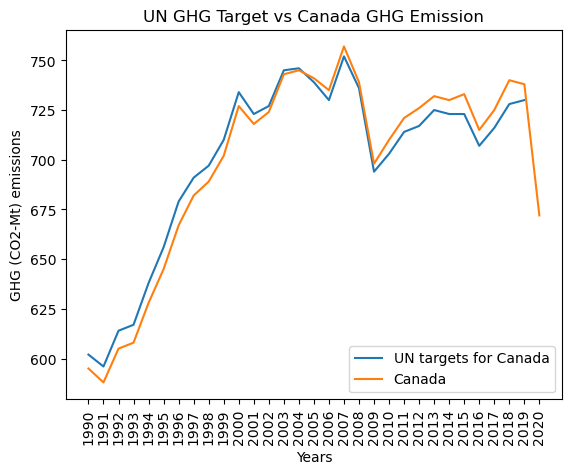

In [40]:
#preparing and cleaning original dataset
un_13_2 = un_goals_clean.loc[un_goals_clean['Target'] == '13.2']

can_y = transpose_can_result_2['NATIONAL TOTAL']

# can_x = transpose_can_result_2['Years']
can_x = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002",
          "2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",
          "2013","2014","2015","2016","2017","2018","2019", '2020']
un_y = un_13_2['Value'].round().astype(int)

# un_x = un_13_2['TimePeriod']
un_x = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002",
          "2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",
          "2013","2014","2015","2016","2017","2018","2019"]

plt.plot(un_x, un_y, label = 'UN targets for Canada')
plt.plot(can_x, can_y, label = 'Canada')                                                      
plt.legend()
plt.xticks(rotation = 90)
plt.ylabel('GHG (CO2-Mt) emissions')
plt.xlabel('Years')
plt.title('UN GHG Target vs Canada GHG Emission')
plt.savefig('Images/ghgcanvsUN_line.png', bbox_inches='tight')
plt.show()

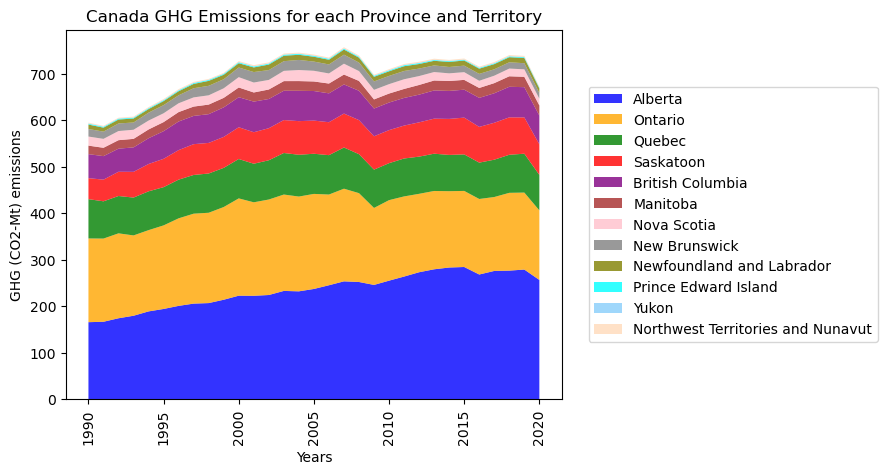

In [41]:
#copying original data and doing some initial cleaning
emission_provterri_df = provices_result.loc[(provices_result['Source'] == 'Provincial Inventory Total') | (provices_result['Source'] == 'Territorial Inventory Total')]
emission_provterri_df2 = emission_provterri_df.drop(columns = ['Index', 'Source', 'Unit']).reset_index(drop = True)

#isolating each province from original datasetcleaning provincial dataset, and adding northwest territoties and nunavut together to match original dataset's format
ab_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Alberta']
bc_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'British Columbia']
mn_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Manitoba']
nb_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'New Brunswick']
nfl_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Newfoundland and Labrador']
ns_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Nova Scotia']
on_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Ontario']
pei_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Prince Edward Island']
qc_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Quebec']
ssk_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Saskatchewan']
yuk_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Yukon']

nwtnvt_1 = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Northwest Territories and Nunavut']
nwtnvt_2 = nwtnvt_1.drop(columns = {'Region'}).reset_index(drop=True)
nwt_nv1 = emission_provterri_df2.loc[(emission_provterri_df2['Region'] == 'Northwest Territories') | (emission_provterri_df2['Region'] == 'Nunavut')]
nwt_nv2 = nwt_nv1.drop(columns={'Region'}).reset_index(drop = True)
nwt_nv3 = nwt_nv2.astype(float)
sum_ghg_nwt_nv = nwt_nv3.groupby('Year').sum()
nwt_nun_ghg = sum_ghg_nwt_nv['CO2eq']
nwt_nun_yr = nwt_nv3['Year'].unique()
nwt_nun_list = {'Year' : nwt_nun_yr, 'CO2eq' : nwt_nun_ghg}
nwt_nun_df = pd.DataFrame(data=nwt_nun_list).reset_index(drop=True)
nwtnvt_df = pd.concat([nwtnvt_2, nwt_nun_df]).reset_index(drop=True)

#further cleaning provincial dataset
ab_ghg1 = ab_ghg.drop(columns = ['Region'])
bc_ghg1 = bc_ghg.drop(columns = ['Region'])
mn_ghg1 = mn_ghg.drop(columns = ['Region'])
nb_ghg1 = nb_ghg.drop(columns = ['Region'])
nfl_ghg1 = nfl_ghg.drop(columns = ['Region'])
ns_ghg1 = ns_ghg.drop(columns = ['Region'])
on_ghg1 = on_ghg.drop(columns = ['Region'])
pei_ghg1 = pei_ghg.drop(columns = ['Region'])
qc_ghg1 = qc_ghg.drop(columns = ['Region'])
ssk_ghg1 = ssk_ghg.drop(columns = ['Region'])
yuk_ghg1 = yuk_ghg.drop(columns = ['Region'])

ab_ghg_fin = ab_ghg1.rename(columns = {'CO2eq' : 'Alberta'}).reset_index(drop=True)
bc_ghg_fin = bc_ghg1.rename(columns = {'CO2eq' : 'British Columbia'}).reset_index(drop=True)
mn_ghg_fin = mn_ghg1.rename(columns = {'CO2eq' : 'Manitoba'}).reset_index(drop=True)
nb_ghg_fin = nb_ghg1.rename(columns = {'CO2eq' : 'New Brunswick'}).reset_index(drop=True)
nfl_ghg_fin = nfl_ghg1.rename(columns = {'CO2eq' : 'Newfoundland and Labrador'}).reset_index(drop=True)
ns_ghg_fin = ns_ghg1.rename(columns = {'CO2eq' : 'Nova Scotia'}).reset_index(drop=True)
on_ghg_fin = on_ghg1.rename(columns = {'CO2eq' : 'Ontario'}).reset_index(drop=True)
pei_ghg_fin = pei_ghg1.rename(columns = {'CO2eq' : 'Prince Edward Island'}).reset_index(drop=True)
qc_ghg_fin = qc_ghg1.rename(columns = {'CO2eq' : 'Quebec'}).reset_index(drop=True)
ssk_ghg_fin = ssk_ghg1.rename(columns = {'CO2eq' : 'Saskatoon'}).reset_index(drop=True)
yuk_ghg_fin = yuk_ghg1.rename(columns = {'CO2eq' : 'Yukon'}).reset_index(drop=True)
nwt_nvt_ghg_fin = nwtnvt_df.rename(columns = {'CO2eq' : "Northwest Territories and Nunavut"})

#merging dataset
prvterghg1 = ab_ghg_fin.merge(bc_ghg_fin, on = 'Year', how = 'left')
prvterghg2 = prvterghg1.merge(mn_ghg_fin, on = 'Year', how = 'left')
prvterghg3 = prvterghg2.merge(nb_ghg_fin, on = 'Year', how = 'left')
prvterghg4 = prvterghg3.merge(nfl_ghg_fin, on = 'Year', how = 'left')
prvterghg5 = prvterghg4.merge(ns_ghg_fin, on = 'Year', how = 'left')
prvterghg6 = prvterghg5.merge(on_ghg_fin, on = 'Year', how = 'left')
prvterghg7 = prvterghg6.merge(pei_ghg_fin, on = 'Year', how = 'left')
prvterghg8 = prvterghg7.merge(qc_ghg_fin, on = 'Year', how = 'left')
prvterghg9 = prvterghg8.merge(ssk_ghg_fin, on = 'Year', how = 'left')
prvterghg10 = prvterghg9.merge(yuk_ghg_fin, on = 'Year', how = 'left')
prv_ter_ghg = prvterghg10.merge(nwt_nvt_ghg_fin, on = 'Year', how = 'left')

#plotting
prv_ter_ghg_df = prv_ter_ghg[['Alberta', 'Ontario', 'Quebec', 'Saskatoon', 'British Columbia', 'Manitoba', 'Nova Scotia',
                            'New Brunswick', 'Newfoundland and Labrador', 'Prince Edward Island', 'Yukon',
                           'Northwest Territories and Nunavut']].astype(float)
prv_ter_ghg_dict = prv_ter_ghg_df.to_dict('list')

prv_ter_ghg_years = prv_ter_ghg['Year']

fig, ax = plt.subplots()
ax.stackplot(prv_ter_ghg_years, prv_ter_ghg_dict.values(), labels = prv_ter_ghg_dict.keys(), alpha = 0.8, colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray',
             'olive', 'cyan', 'lightskyblue', 'peachpuff'])
ax.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 90)
plt.ylabel('GHG (CO2-Mt) emissions')
plt.xlabel('Years')
plt.title('Canada GHG Emissions for each Province and Territory')
plt.savefig('Images/ghgpercanprovandteri_stackplt.png', bbox_inches='tight')
plt.show()

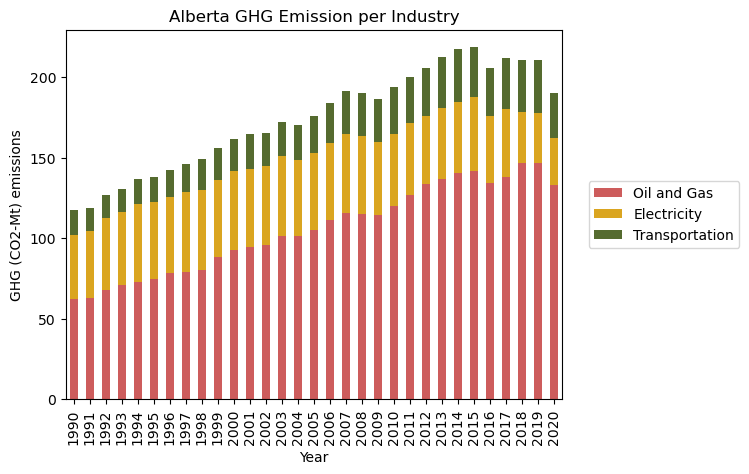

---------------------------------------------------------------------------------------------------------


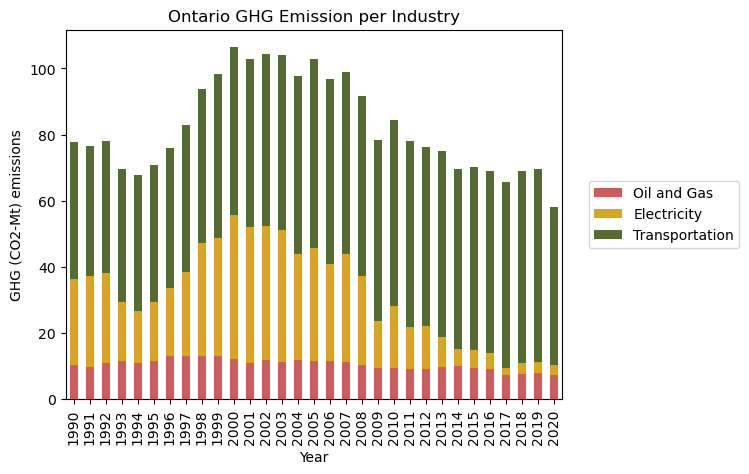

---------------------------------------------------------------------------------------------------------


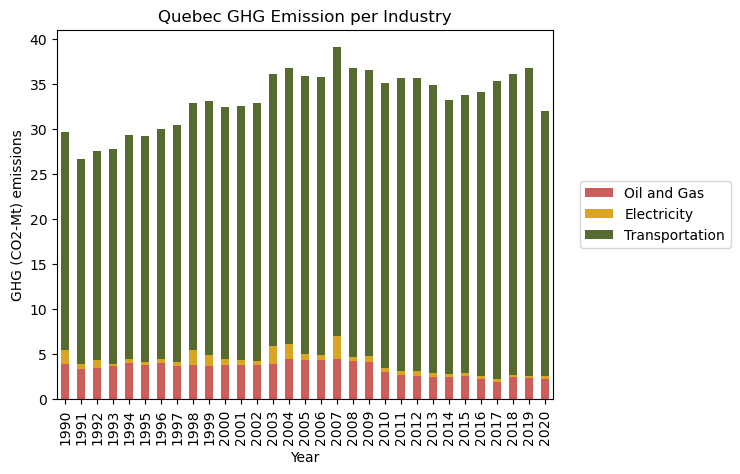

In [42]:
#AB's, ON's, and QC's GHG emission per industry (Oil and Gas, Electricity, and Transportation)

ab1 = provices_result.loc[(provices_result['Region'] == 'Alberta')]
ab2 = ab1.loc[(ab1['Source'] == 'Provincial Inventory Total') 
                    | (ab1['Source'] == 'Oil and Gas') | (ab1['Source'] == 'Electricity')
                    | (ab1['Source'] == 'Transport')
                   ]

ab_oilgas_df = ab2.loc[ab2['Source'] == 'Oil and Gas']
ab_elect_df = ab2.loc[ab2['Source'] == 'Electricity']
ab_transp_df = ab2.loc[ab2['Source'] == 'Transport']

ab_oilgas_cln = ab_oilgas_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
ab_elect_cln = ab_elect_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
ab_transp_cln = ab_transp_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])

ab_oilgas = ab_oilgas_cln.rename(columns = {'CO2eq' : 'Oil and Gas'}).reset_index(drop=True)
ab_elect = ab_elect_cln.rename(columns = {'CO2eq' : 'Electricity'}).reset_index(drop=True)
ab_transp = ab_transp_cln.rename(columns = {'CO2eq' : 'Transportation'}).reset_index(drop=True)

ab_inds_merge = ab_oilgas.merge(ab_elect, on = 'Year', how = 'left')
ab_inds_merge1 = ab_inds_merge.merge(ab_transp, on = 'Year', how = 'left')
ab_inds_fin = ab_inds_merge1.apply(pd.to_numeric)

ab_inds_plot = ab_inds_fin.plot(x = 'Year', kind = 'bar', stacked = True, color = ['indianred', 'goldenrod', 'darkolivegreen'], title = 'Alberta GHG Emission per Industry')
plt.ylabel('GHG (CO2-Mt) emissions')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.savefig('Images/ghgAB_bar.png', bbox_inches='tight')
plt.show()

print('---------------------------------------------------------------------------------------------------------')

on1 = provices_result.loc[(provices_result['Region'] == 'Ontario')]
on2 = on1.loc[(on1['Source'] == 'Provincial Inventory Total') 
                    | (on1['Source'] == 'Oil and Gas') | (on1['Source'] == 'Electricity')
                    | (on1['Source'] == 'Transport')
                   ]

on_oilgas_df = on2.loc[on2['Source'] == 'Oil and Gas']
on_elect_df = on2.loc[on2['Source'] == 'Electricity']
on_transp_df = on2.loc[on2['Source'] == 'Transport']

on_oilgas_cln = on_oilgas_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
on_elect_cln = on_elect_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
on_transp_cln = on_transp_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])

on_oilgas = on_oilgas_cln.rename(columns = {'CO2eq' : 'Oil and Gas'}).reset_index(drop=True)
on_elect = on_elect_cln.rename(columns = {'CO2eq' : 'Electricity'}).reset_index(drop=True)
on_transp = on_transp_cln.rename(columns = {'CO2eq' : 'Transportation'}).reset_index(drop=True)

on_inds_merge = on_oilgas.merge(on_elect, on = 'Year', how = 'left')
on_inds_merge1 = on_inds_merge.merge(on_transp, on = 'Year', how = 'left')
on_inds_fin = on_inds_merge1.apply(pd.to_numeric)

on_inds_plot = on_inds_fin.plot(x = 'Year', kind = 'bar', stacked = True, color = ['indianred', 'goldenrod', 'darkolivegreen'], title = 'Ontario GHG Emission per Industry')
plt.ylabel('GHG (CO2-Mt) emissions')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.savefig('Images/ghgON_bar.png', bbox_inches='tight')
plt.show()

print('---------------------------------------------------------------------------------------------------------')

qc1 = provices_result.loc[(provices_result['Region'] == 'Quebec')]
qc2 = qc1.loc[(qc1['Source'] == 'Provincial Inventory Total') 
                    | (qc1['Source'] == 'Oil and Gas') | (qc1['Source'] == 'Electricity')
                    | (qc1['Source'] == 'Transport')
                   ]

qc_oilgas_df = qc2.loc[qc2['Source'] == 'Oil and Gas']
qc_elect_df = qc2.loc[qc2['Source'] == 'Electricity']
qc_transp_df = qc2.loc[qc2['Source'] == 'Transport']

qc_oilgas_cln = qc_oilgas_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
qc_elect_cln = qc_elect_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
qc_transp_cln = qc_transp_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])

qc_oilgas = qc_oilgas_cln.rename(columns = {'CO2eq' : 'Oil and Gas'}).reset_index(drop=True)
qc_elect = qc_elect_cln.rename(columns = {'CO2eq' : 'Electricity'}).reset_index(drop=True)
qc_transp = qc_transp_cln.rename(columns = {'CO2eq' : 'Transportation'}).reset_index(drop=True)

qc_inds_merge = qc_oilgas.merge(qc_elect, on = 'Year', how = 'left')
qc_inds_merge1 = qc_inds_merge.merge(qc_transp, on = 'Year', how = 'left')
qc_inds_fin = qc_inds_merge1.apply(pd.to_numeric)

qc_inds_plot = qc_inds_fin.plot(x = 'Year', kind = 'bar', stacked = True, color = ['indianred', 'goldenrod', 'darkolivegreen'], title = 'Quebec GHG Emission per Industry')
# plt.color(['salmon', 'goldenrod', 'cornflowerblue'])
plt.ylabel('GHG (CO2-Mt) emissions')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.savefig('Images/ghgQC_bar.png', bbox_inches='tight')
plt.show()